In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#*Loading the Dataset*

In [78]:
data = pd.read_csv('Fraud.csv')

#*Data Analysis*

In [79]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [80]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [81]:
data.nunique()

,0
step,134
type,5
amount,1188050
nameOrig,1239743
oldbalanceOrg,474354
newbalanceOrig,546072
nameDest,531463
oldbalanceDest,713712
newbalanceDest,551352
isFraud,2


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240107 entries, 0 to 1240106
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1240107 non-null  int64  
 1   type            1240107 non-null  object 
 2   amount          1240107 non-null  float64
 3   nameOrig        1240106 non-null  object 
 4   oldbalanceOrg   1240106 non-null  float64
 5   newbalanceOrig  1240106 non-null  float64
 6   nameDest        1240106 non-null  object 
 7   oldbalanceDest  1240106 non-null  float64
 8   newbalanceDest  1240106 non-null  float64
 9   isFraud         1240106 non-null  float64
 10  isFlaggedFraud  1240106 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 104.1+ MB


In [83]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.240107e+06,1.240107e+06,1.240106e+06,1.240106e+06,1.240106e+06,1.240106e+06,1.240106e+06,1240106.0
mean,4.266574e+01,1.625868e+05,8.736643e+05,8.939681e+05,9.845811e+05,1.117805e+06,1.238604e-03,0.0
std,3.958965e+01,2.743862e+05,2.965380e+06,3.001778e+06,2.303928e+06,2.417703e+06,3.517202e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.600000e+01,1.265617e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.400000e+01,7.785386e+04,1.560700e+04,0.000000e+00,1.286721e+05,2.219558e+05,0.000000e+00,0.0
75%,4.300000e+01,2.176460e+05,1.314552e+05,1.714641e+05,9.268944e+05,1.156895e+06,0.000000e+00,0.0
max,1.340000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


# *Data Cleaning*

In [84]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


Here nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud has 1 missing value which is statistically negligible so we can just drop the rows containing null values -> data becomes clean.

In [85]:
data.dropna(inplace=True)

In [86]:
data = data.reset_index(drop=True)

In [87]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [88]:
legit = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  1238570
Number of Fraud transactions:  1536
Percentage of Legit transactions: 99.8761 %
Percentage of Fraud transactions: 0.1239 %


Percentage of Legit transactions is 99.9384 % and Percentage of Fraud transactions is 0.0616 % in the dataset which shows that data distribution is imbalanced

For which RandomForestClassifier or decision tree classifier are good for choice for the model

#*Visualization*

###Correlation HeatMap

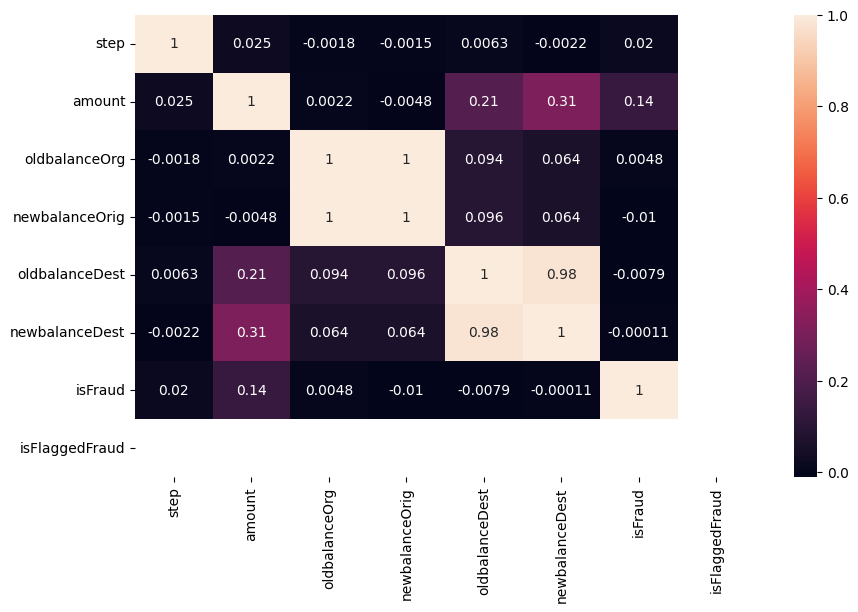

In [89]:
corr = data.drop(['type', 'nameOrig', 'nameDest'], axis=1).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

###Number of Legit and Fraud Transactions


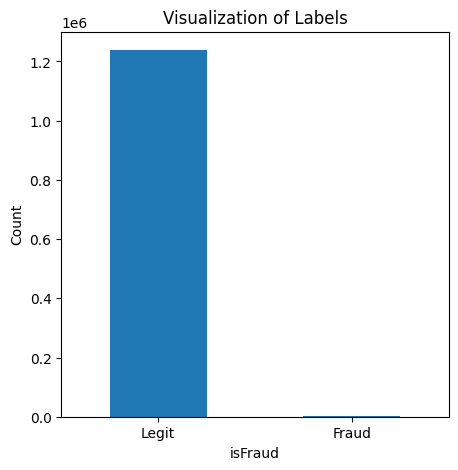

In [90]:
plt.figure(figsize=(5,5))
labels = ["Legit", "Fraud"]
count_classes = data.value_counts(data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

#*Problem Solving*

In [91]:
#Making a copy of og dataset for training and evaluatuion of model

dataCopy = data.copy()

In [92]:
dataCopy.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [93]:
dataCopy.type.value_counts()

,count
type,
CASH_OUT,441002
PAYMENT,418016
CASH_IN,270042
TRANSFER,102633
DEBIT,8413


In [94]:
objList = dataCopy.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


There are three attrributes with object datatype.Therefore we need to label encode them to check for multicolinearity

In [95]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataCopy[feat] = le.fit_transform(dataCopy[feat].astype(str))

print (dataCopy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240106 entries, 0 to 1240105
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1240106 non-null  int64  
 1   type            1240106 non-null  int64  
 2   amount          1240106 non-null  float64
 3   nameOrig        1240106 non-null  int64  
 4   oldbalanceOrg   1240106 non-null  float64
 5   newbalanceOrig  1240106 non-null  float64
 6   nameDest        1240106 non-null  int64  
 7   oldbalanceDest  1240106 non-null  float64
 8   newbalanceDest  1240106 non-null  float64
 9   isFraud         1240106 non-null  float64
 10  isFlaggedFraud  1240106 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 104.1 MB
None


In [96]:
dataCopy.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,147848,170136.0,160296.36,325138,0.0,0.0,0.0,0.0
1,1,3,1864.28,427305,21249.0,19384.72,339125,0.0,0.0,0.0,0.0
2,1,4,181.00,195262,181.0,0.00,87107,0.0,0.0,1.0,0.0
3,1,1,181.00,1137342,181.0,0.00,77539,21182.0,0.0,1.0,0.0
4,1,3,11668.14,671923,41554.0,29885.86,163473,0.0,0.0,0.0,0.0


##Calculating variance inflation factor to determine multi linearity

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df):
    numeric_df = data.select_dtypes(include=['int64', 'float64']).dropna()
    X = add_constant(numeric_df)

    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i+1)
                       for i in range(len(numeric_df.columns))]
    return vif_data

vif_df = calculate_vif(data)
print(vif_df)


          Feature         VIF
0            step    1.004946
1          amount    1.485825
2   oldbalanceOrg  581.482460
3  newbalanceOrig  583.621564
4  oldbalanceDest   35.417323
5  newbalanceDest   37.127641
6         isFraud    1.145288
7  isFlaggedFraud         NaN


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


 Here oldbalanceOrg and newbalanceOrig have very high VIF which means they are highly corelated.Similarly oldbalanceDest and newbalancedest.

In [102]:
dataCopy['Actual_amount_orig'] = dataCopy.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
dataCopy['Actual_amount_dest'] = dataCopy.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
dataCopy['TransactionPath'] = dataCopy.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
dataCopy = dataCopy.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

calculate_vif(dataCopy)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,step,1.004946
1,amount,1.485825
2,oldbalanceOrg,581.482460
3,newbalanceOrig,583.621564
4,oldbalanceDest,35.417323
5,newbalanceDest,37.127641
6,isFraud,1.145288
7,isFlaggedFraud,NaN


Here after getting to know about the colinearity in the data we can either drop one of those columns or we can create derieved features in which we can calculate the actual debited and actual credited amount and remove the redunadnt columns.

<Axes: >

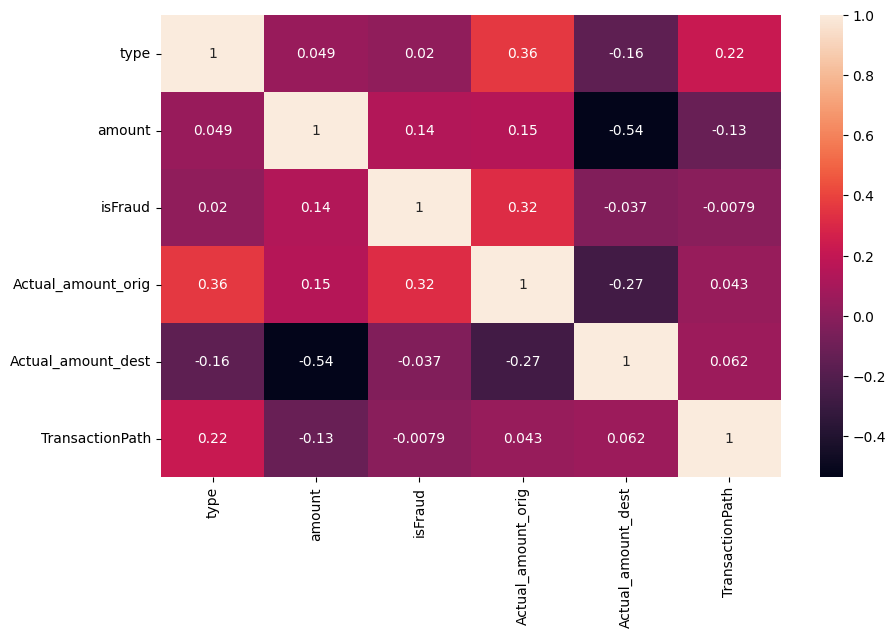

In [103]:
corr=dataCopy.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#*Model Building*

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [105]:
#Normalizing data

scaler = StandardScaler()
dataCopy["NormalizedAmount"] = scaler.fit_transform(dataCopy["amount"].values.reshape(-1, 1))
dataCopy.drop(["amount"], inplace= True, axis= 1)

Y = dataCopy["isFraud"]
X = dataCopy.drop(["isFraud"], axis= 1)

In [106]:
#Splitting data for training and testing
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (868074, 5)
Shape of X_test:  (372032, 5)


In [107]:
#Decision Tree Model

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [108]:
#Random Forest Model

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

#*Evaluation*

In [110]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.91371709960434
Random Forest Score:  99.95457380010322


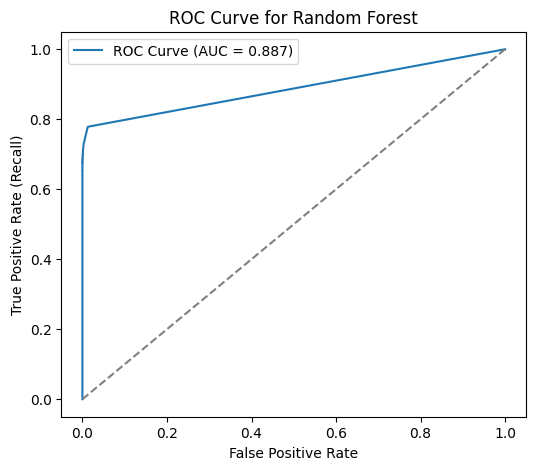

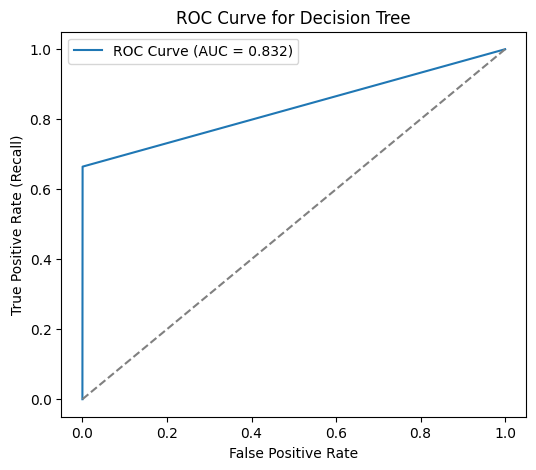

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# ROC Curve for Random Forest
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_rf)
roc_auc = roc_auc_score(Y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()



# ROC Curve for Decision Tree
y_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(Y_test, y_prob_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f"ROC Curve (AUC = {roc_auc_dt:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Decision Tree")
plt.legend()
plt.show()



Here ROC for Random Forest with 0.887 outperforms Decision Tree with 0.832 which means Random Forest will perform better than Decision Tree

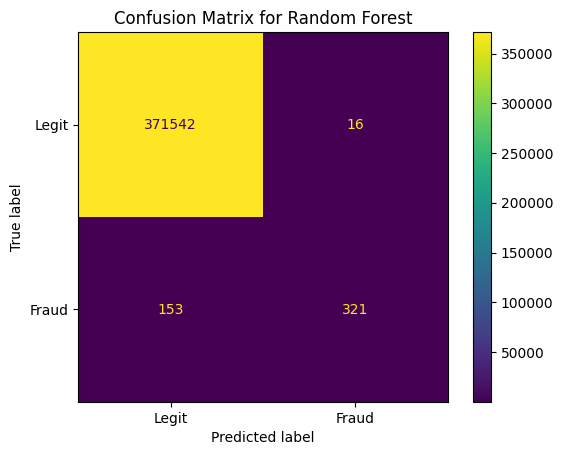

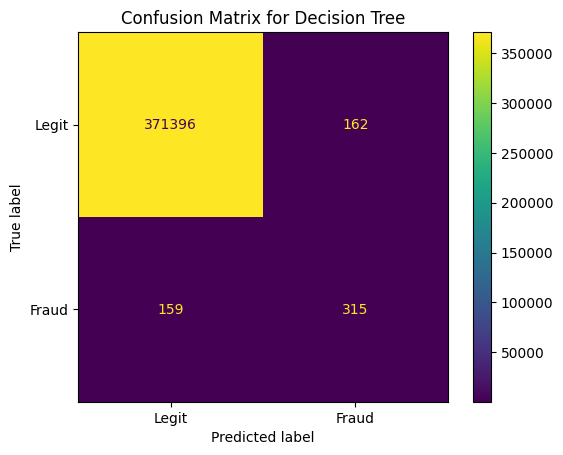

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    371558
         1.0       0.95      0.68      0.79       474

    accuracy                           1.00    372032
   macro avg       0.98      0.84      0.90    372032
weighted avg       1.00      1.00      1.00    372032

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    371558
         1.0       0.66      0.66      0.66       474

    accuracy                           1.00    372032
   macro avg       0.83      0.83      0.83    372032
weighted avg       1.00      1.00      1.00    372032



In [122]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Legit', 'Fraud'])
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()



# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Legit', 'Fraud'])
disp_dt.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Classification Report for random forest
print("Classification Report for Random Forest:")
print(classification_report(Y_test, Y_pred_rf))
# Classification Report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(Y_test, Y_pred_dt))

Here, the Random Forest detects fraud more effectively (precision = 0.95, recall = 0.68, F1 = 0.79) compared to the Decision Tree (precision = 0.66, recall = 0.66, F1 = 0.66), making Random Forest the better model for fraud detection.

# **Conclusion**

### **1. Data Cleaning including missing values, outliers and multi-collinearity**

It is observed that the dataset has practically very few missing values and hence they were dropped, since their impact is almost trivial. Outliers were detected in transaction amounts and balances using IQR and boxplots. Since fraud is most often "outlier-like" behavior, those values were not dropped. Multicollinearity between `oldbalanceOrg`-`newbalanceOrig` and `oldbalanceDest`-`newbalanceDest` was extremely high. To solve this, two new features (`Actual_amount_orig`, `Actual_amount_dest`) were created, and the redundant balance columns were removed.

---

### **2. Fraud Detection Model Under Elaboration**

Random Forest and Decision Tree were compared. Accuracy was more or less the same for all because of the class imbalance, but Random Forest gave **precision = 0.95, recall = 0.68, F1 = 0.79**, while Decision Tree gave **precision = 0.66, recall = 0.66, F1 = 0.66**.

For fraud detection, **precision holds more weight** as naming genuine customers falsely would definitely dent their trust, whereas recall guarantees that we catch most cases of fraud. Random Forest, being an ensemble of trees, captures

---

### **3. How did you select variables to be included in the model?**

Variables were selected according to correlation, VIF, and model importance scores. Those that were very collinear underwent transformation into net transaction features. The final features were: amount, type, Actual_amount_orig, Actual_amount_dest, TransactionPath, and flags.

---

### **4. Model Performance**

Random forest outperformed decision trees, with the ROC-AUC 0.887 compared to 0.832, and also higher F1 and precision values. Stratified splits, confusion matrix, ROC and PR curves were used for validations. This implies that a random forest generalizes better and minimizes false positives and false negatives than the decision tree classifier.

---

### **5. Key Indicators of Fraudulent Customer**

(a) The amount for transactions (unusually large).

(b) Mismatch of balance between the origin and the destination accounts.

(c) The transaction type (cash-out, transfer are more prone).

(d) Suspicious sender–receiver paths.

(e) High velocity or repeated transactions.

---

### **6. Do These Factors Make Sense?**

Yes. Fraud customers typically carry out above-the-board transfers, use risky money transfer types, and produce imbalanced entries to disguise fraud. They repeat sender-receiver loops to launder money. These are matched with real-life fraud behaviours.

---

### **7. Prevention Recommendations While Updating Infrastructure**

Permit transactions only through verified banking apps.

Ensure a secure site and HTTPS.

Strongly authenticate (OTP, biometric).

Detect device/IP anomalies.

Set velocity checks and limits.

Educate users not to respond to phishing or unsolicited communication.

---

### **8. How Do We Know if These Actions are Working?**

Reduction in fraud rate and reduction of false positives.

A/B testing setups: compare new system versus old rules.

Banks send e-statements and alerts to customers.

Customers check their account activity and report immediately.

Track important KPIs, like number of frauds stopped, complaints from users, and system latency.

So, Conclusion is Random Forest was used because it has higher precision and recall than Decision Trees and is thus better applied for fraud detection in an imbalanced dataset.